In [1]:
"""
#############################################################################

PROBLEM STATEMENT:

    1. Does subject's race influence the outcome of an encounter with police?

#############################################################################

FEATURE SUMMARY:

    1. Number of variables: 4
    2. Variable name definitions:
        i. incident_result: 0=deceased, 1=shot and injured, 2=shoot and miss 
            (officer discharged weapon but missed), 3=other
        ii. subject_weapon_type: 0=unarmed, 1=firearm (rifle, handgun, shotgun, 
            etc.), 2=knife, 3=other
        iii. subject_race: 0=black, 1=white, 2=latino, 3=other
        iv. subject_gender: 0=female, 1=male, 2=other (not listed in dataset)

#############################################################################
"""

%pylab inline

import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib


C:\Users\joaquin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [26]:
sop_df = pd.read_csv('../../../data/OpenData/Dallas_police_involved_shootings_mod.csv')
sop_df.head()

,incident_result,subject_weapon_type,subject_race,subject_gender
0,1,1,2,1
1,1,1,2,1
2,3,1,2,1
3,2,0,0,1
4,1,3,0,1


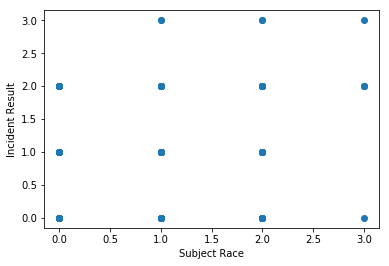

In [27]:
"""
Visualize Data
"""

subrace = sop_df['subject_race']
results = sop_df['incident_result']
p = plot(results, subrace,'o')
ax = gca()
xt = ax.set_xlabel('Subject Race')
yt = ax.set_ylabel('Incident Result')

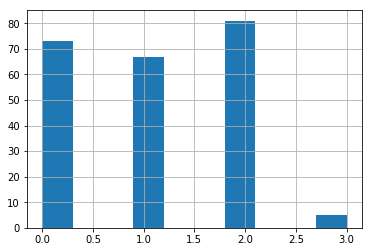

In [35]:
"""
Plot data in a histogram.
"""

plt.figure()
results = sop_df['incident_result']
p = results.hist()

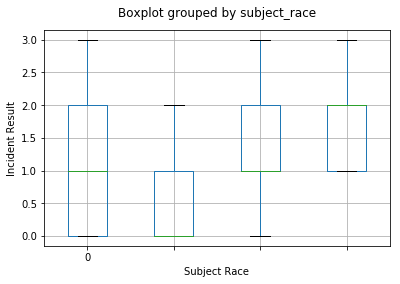

In [38]:
"""
Show race vs. incident result distribution in a boxplot.
"""

plt.figure()
p = sop_df.boxplot('incident_result','subject_race')
q = p.set_xticklabels(['0','','','','1','','','','2','','','','3'])

q0 = p.set_xlabel('Subject Race')
q1 = p.set_ylabel('Incident Result')
q2 = p.set_title('                          ')

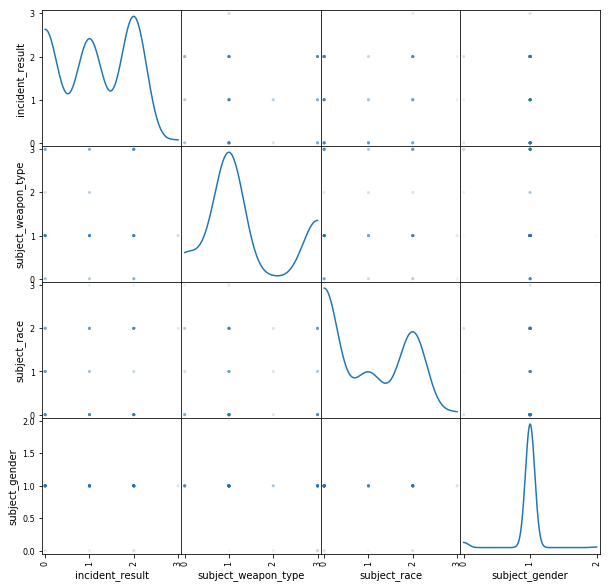

In [30]:
"""
FINDINGS:

    1. An encounter with police seem to end, primarily, with the subject being shot.
    2. Possession of a firearm of some kind usually results in the police shooting.
    3. Members of the Black race are usually shot during such encounters.
    4. Males across all racial backgrounds make up the majority of reported incidents.
"""

a = pd.plotting.scatter_matrix(sop_df,alpha=0.05,figsize=(10,10), diagonal='kde')

In [33]:
"""
Analyze the Data

Is incident result influenced by subject race?
"""

subrace = sop_df['subject_race']
subweap = sop_df['subject_weapon_type']
results = sop_df['incident_result']

"""
Reshape data to columns.
"""

y = np.matrix(subrace).transpose()
x1 = np.matrix(results).transpose()
x2 = np.matrix(subweap).transpose()

"""
Create an input matrix.
"""

x = np.column_stack([x1,x2])

"""
Create a linear model and fit it to the data.
"""

X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

print('Coefficients: ', f.params[0:2])
print('Intercept: ', f.params[2])
print('P-Values: ', f.pvalues)
print('R-Squared: ', f.rsquared)

Coefficients:  [ 0.74821983  0.10441598]
Intercept:  0.0134492996091
P-Values:  [  3.09765200e-08   1.47165663e-01   8.23874696e-01]
R-Squared:  0.00977652930752


In [ ]:
"""
CONCLUSIONS: 

    1. If there is an encounter with police that involves 
       the subject possessing a weapon of any kind, the incident 
       will most likely result in a police involced shooting.
    2. Black males are the most likely group to be shot during an 
       encounter with police.
    3. Latino males also have a significant chance of being shot by
       police under the same conditions; though less likely than Blacks.

CAVEATS:

    1. The data and analysis thereof, presented here, does not paint a 
       thorough picture of the incidents in question. Several of any other
       factors may influence the outcome os said incidents; for example:
       situations in which police ordered the subject to drop the weapon before 
       firing, subjects that charged the officer(s) while armed, adrenaline rush, 
       mob mentality (on both the police and subject's part (some data had multiple
       subjects in a single incident)), etc. The dataset did not include any such 
       information. As a result, this was done merely for personal reasearch and 
       educational purposes.

"""